In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import sys
sys.path.append(os.path.abspath(".."))
from src.config import AGENTS


In [7]:
log_path = os.path.join("results", "logs", "eval_rewards.npy")

if os.path.exists(log_path):
    rewards_per_agent = np.load(log_path, allow_pickle=True).item()
else:
    # fallback dummy (simulate 5 episodes)
    rewards_per_agent = {
        "AA": [12000, 13500, 14000, 12800, 13300],
        "DL": [8000, 7600, 7900, 7800, 7700],
        "UA": [13000, 12800, 12750, 13100, 13050],
        "B6": [10500, 11000, 10850, 10700, 11200],
    }

C:\Users\Jaya\AppData\Local\Temp\ipykernel_23568\3009590654.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avg_rewards.keys()), y=list(avg_rewards.values()), palette="muted")


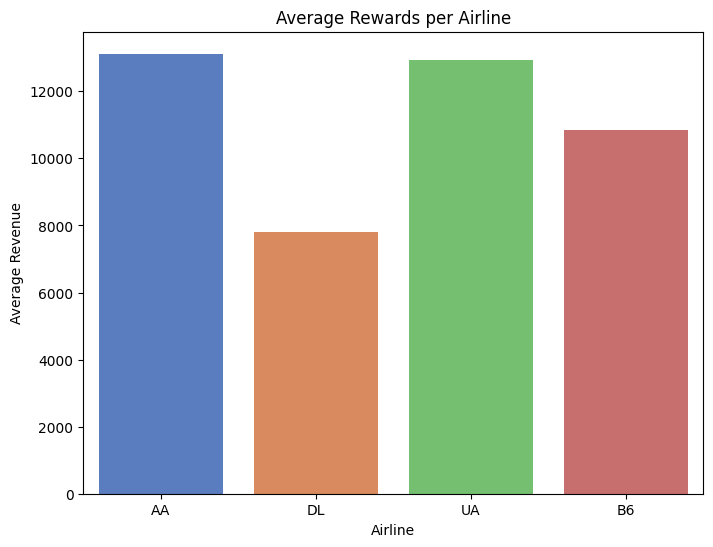

In [8]:
avg_rewards = {a: np.mean(r) for a, r in rewards_per_agent.items()}

plt.figure(figsize=(8,6))
sns.barplot(x=list(avg_rewards.keys()), y=list(avg_rewards.values()), palette="muted")
plt.title("Average Rewards per Airline")
plt.ylabel("Average Revenue")
plt.xlabel("Airline")
plt.show()


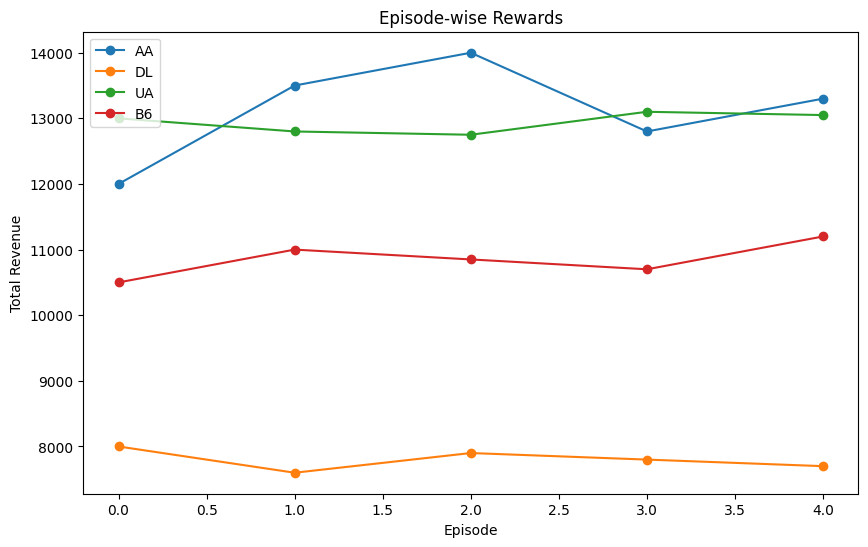

In [9]:
plt.figure(figsize=(10,6))
for agent, rewards in rewards_per_agent.items():
    plt.plot(rewards, marker="o", label=agent)

plt.title("Episode-wise Rewards")
plt.xlabel("Episode")
plt.ylabel("Total Revenue")
plt.legend()
plt.show()


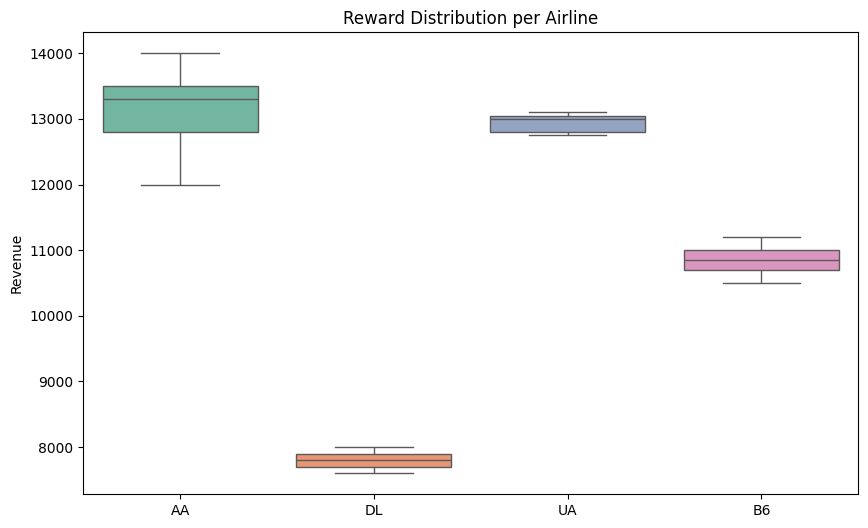

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=[rewards_per_agent[a] for a in AGENTS], palette="Set2")
plt.xticks(ticks=range(len(AGENTS)), labels=AGENTS)
plt.title("Reward Distribution per Airline")
plt.ylabel("Revenue")
plt.show()
